In [1]:
!pip install -q kaggle

In [5]:
!pip install pandas

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datum1504","key":"0e761b69cd049d8b79938653fb8d5546"}'}

In [3]:
# To load the kaggle Dataset
# Please Upload the kaggle.json file to the current directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Downloading and unzipping dataset
! mkdir traffic_dataset
! kaggle datasets download -d silicon99/dft-accident-data
! unzip dft-accident-data.zip -d traffic_dataset/

 94% 105M/112M [00:00<00:00, 95.2MB/s] 
100% 112M/112M [00:00<00:00, 121MB/s] 
Archive:  dft-accident-data.zip
  inflating: traffic_dataset/Accidents0515.csv  
  inflating: traffic_dataset/Casualties0515.csv  
  inflating: traffic_dataset/Vehicles0515.csv  
  inflating: traffic_dataset/contextCSVs/Accident_Severity.csv  
  inflating: traffic_dataset/contextCSVs/Age_Band.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Class.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Severity.csv  
  inflating: traffic_dataset/contextCSVs/Casualty_Type.csv  
  inflating: traffic_dataset/contextCSVs/Day_of_Week.csv  
  inflating: traffic_dataset/contextCSVs/Journey_Purpose.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Control.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Detail.csv  
  inflating: traffic_dataset/contextCSVs/Junction_Location.csv  
  inflating: traffic_dataset/contextCSVs/Light_Conditions.csv  
  inflating: traffic_dataset/contextCSVs/Local_Authorit

In [1]:
import pandas as pd
accidents = pd.read_csv('traffic_dataset/Accidents0515.csv',index_col='Accident_Index')

In [8]:
print(accidents.head())

                Location_Easting_OSGR  ...  LSOA_of_Accident_Location
Accident_Index                         ...                           
200501BS00001                525680.0  ...                  E01002849
200501BS00002                524170.0  ...                  E01002909
200501BS00003                524520.0  ...                  E01002857
200501BS00004                526900.0  ...                  E01002840
200501BS00005                528060.0  ...                  E01002863

[5 rows x 31 columns]


In [9]:
for i in accidents.columns:
  print(i)

Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Date
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8702722950> (for post_execute):


KeyboardInterrupt: ignored

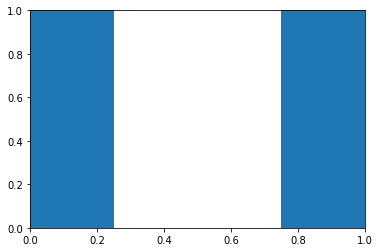

In [2]:
import pandas as pd
import matplotlib.pyplot as plot
accidents.plot.bar(x="Accident_Severity", y="Speed_limit", rot=70, title="test");
plot.show(block=True);

Text(0.5, 0, 'Accidents')

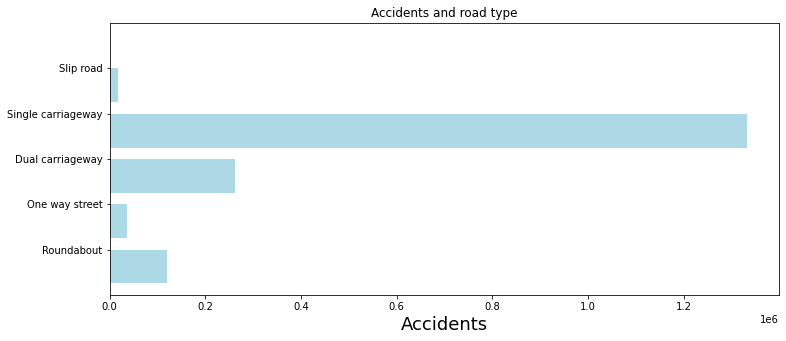

In [4]:
road=accidents[accidents.Road_Type!=9] # deleting rows:'not known'
road1 = road.loc[:,'Road_Type'].groupby(road['Road_Type']).count()

road=pd.DataFrame(data=road1)
road['road']=road.index
road.columns=['Accidents', 'road']
road.index=['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road']
road.plot(kind='barh',  title='Accidents and road type', figsize=(12,5), legend=False, color='lightblue', alpha=1, width=1.5)
plt.xlabel('Accidents' , fontsize = 18)

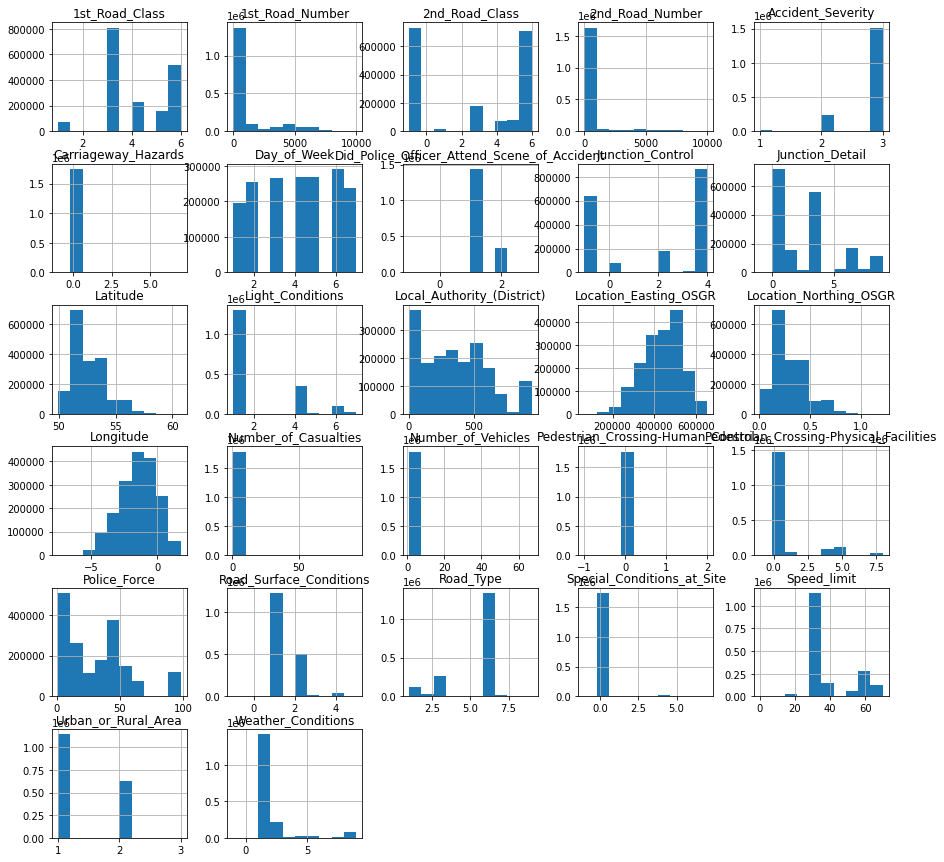

In [4]:
accidents.hist(figsize=(15,15));

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86b52d6240>],
      dtype=object)

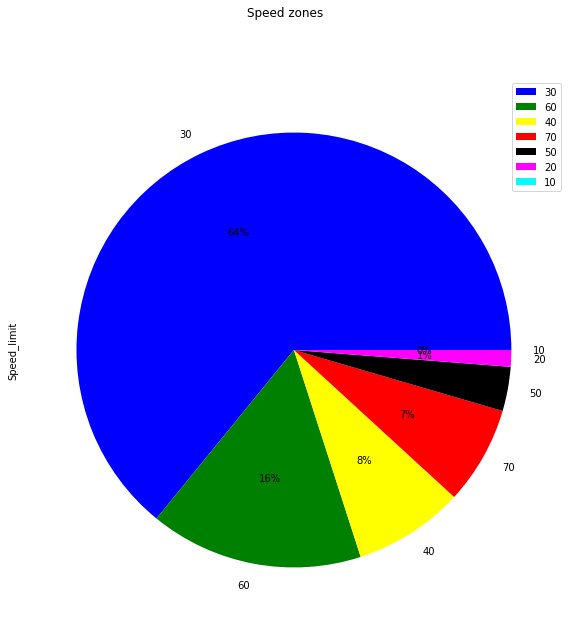

In [6]:
speed1 = accidents.loc[accidents['Speed_limit'].isin(['30', '40', '50', '20', '60' ,'70', '10'])] 
speed = speed1.Speed_limit.value_counts()
speed.plot(kind='pie', subplots=True, figsize=(10,10), colors=['blue', 'green','yellow', 'red','black','magenta','cyan'],  autopct='%1.0f%%', title="Speed zones",legend=True)

In [10]:
casualties=pd.read_csv('traffic_dataset/Casualties0515.csv' , error_bad_lines=False,warn_bad_lines=False)
gen=casualties['Sex_of_Casualty']
c1=0
c2=0
for i in gen:
  if i==1:
    c1+=1
  else:
    c2+=1
print("1: ",c1)
print("2: ",c2)

1:  1292262
2:  924458


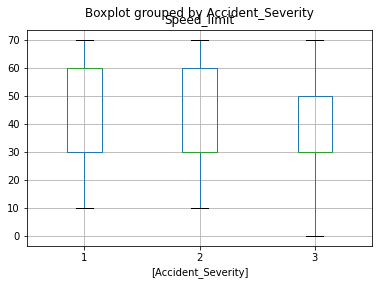

In [5]:
accidents.boxplot(column=['Speed_limit'], by=['Accident_Severity'])

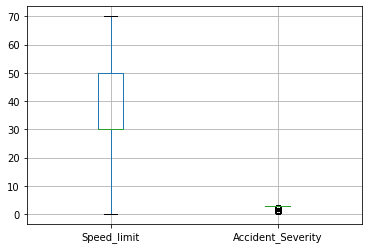

In [6]:
accidents.boxplot(column=['Speed_limit', 'Accident_Severity'])

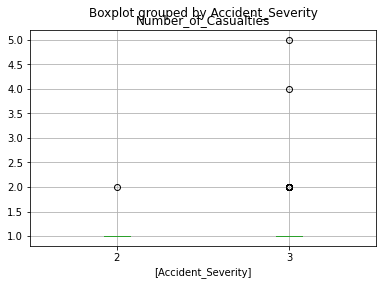

In [8]:
mini_df=accidents[:100]
mini_df.boxplot(column=['Number_of_Casualties'], by=['Accident_Severity'])



In [11]:
for i in casualties.columns:
  print(i)

Accident_Index
Vehicle_Reference
Casualty_Reference
Casualty_Class
Sex_of_Casualty
Age_of_Casualty
Age_Band_of_Casualty
Casualty_Severity
Pedestrian_Location
Pedestrian_Movement
Car_Passenger
Bus_or_Coach_Passenger
Pedestrian_Road_Maintenance_Worker
Casualty_Type
Casualty_Home_Area_Type


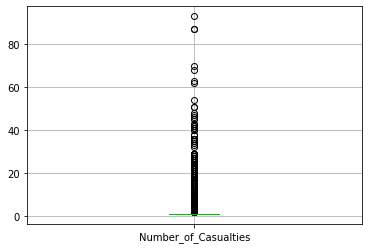

In [15]:
accidents.boxplot(column=['Number_of_Casualties'])
#casualties.boxplot(column=['Sex_of_Casualty'])